# **Chicago Crime Data vs Weather - 2016** 

In [21]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [22]:
crime_categories = pd.read_csv('CrimeCategories.csv')
weather = pd.read_csv('temperature_2016.csv')
crime = pd.read_csv('Crime_data_2016.csv')

In [23]:
crime['Month']= pd.DatetimeIndex(crime['ShortDate']).month
crime.head()

,Unnamed: 0,Case Number,Primary Type,Date,ShortDate,Hour,Year,DateConvert,Month
0,646621,JA119772,THEFT,12/31/2016 23:59,12/31/2016,23,2016,4270523,12
1,646622,JA100016,BATTERY,12/31/2016 23:58,12/31/2016,23,2016,4270523,12
2,646623,JA100012,BATTERY,12/31/2016 23:55,12/31/2016,23,2016,4270523,12
3,646624,JA100027,LIQUOR LAW VIOLATION,12/31/2016 23:55,12/31/2016,23,2016,4270523,12
4,646625,JA100839,CRIMINAL DAMAGE,12/31/2016 23:54,12/31/2016,23,2016,4270523,12


#### Here we merge our weather and crime data then convert the ShortDate back into datetime format

In [24]:
df = pd.merge(weather, crime, on =['ShortDate','Hour'])
df['ShortDate'] = pd.to_datetime(df['ShortDate'],format='%m/%d/%Y')
print(df['ShortDate'].dtype)

datetime64[ns]


In [25]:
crime_categories.rename(columns={'crime primary type':'Primary Type'},inplace=True)
combined_df = df.merge(crime_categories, how='inner',on='Primary Type')

#### Need to set up bins to break our data up into smaller groups. First determine max and min to determine bin grouping

In [26]:
maxTemp = combined_df['Temp_Farenheit'].max()
minTemp = combined_df['Temp_Farenheit'].min()
print(f"The max temp is: {maxTemp}\nThe min temp is {minTemp}")

The max temp is: 91.634
The min temp is -9.777999999999999


#### Remove duplicate columns to keep dataframe clean

In [27]:
del combined_df['DateConvert_x']
del combined_df['Unnamed: 0']
del combined_df['DateConvert_y']
del combined_df['Date']

In [28]:
combined_df.head()

,datetime,ShortDate,Hour,Chicago,Temp_Farenheit,Case Number,Primary Type,Year,Month,bucket
0,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100075,BATTERY,2016,1,Personal
1,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100077,BATTERY,2016,1,Personal
2,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100044,BATTERY,2016,1,Personal
3,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ122194,BATTERY,2016,1,Personal
4,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100062,BATTERY,2016,1,Personal


In [29]:
bins = [-15,-5,5,15,25,35,45,55,65,75,85,95]
tempName = ['< -5 degrees','-5 to 4.9 degrees','5 to 14.9 degrees','15 to 24.9 degrees','25 to 34.9 degrees','35 to 44.9 degrees'\
            ,'45 to 54.9 degrees','55 to 64.9 degrees','65 to 74.9 degrees','75 to 84.9 degrees','85 to 95 degrees']
combined_df['TempBucket'] = pd.cut(combined_df['Temp_Farenheit'],bins,labels=tempName)
combined_df.head()

,datetime,ShortDate,Hour,Chicago,Temp_Farenheit,Case Number,Primary Type,Year,Month,bucket,TempBucket
0,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100075,BATTERY,2016,1,Personal,25 to 34.9 degrees
1,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100077,BATTERY,2016,1,Personal,25 to 34.9 degrees
2,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100044,BATTERY,2016,1,Personal,25 to 34.9 degrees
3,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ122194,BATTERY,2016,1,Personal,25 to 34.9 degrees
4,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100062,BATTERY,2016,1,Personal,25 to 34.9 degrees
5,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100032,BATTERY,2016,1,Personal,25 to 34.9 degrees
6,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ103526,BATTERY,2016,1,Personal,25 to 34.9 degrees
7,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100088,BATTERY,2016,1,Personal,25 to 34.9 degrees
8,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ100039,BATTERY,2016,1,Personal,25 to 34.9 degrees
9,1/1/2016 0:00,2016-01-01,0,269.470523,25.376941,HZ101144,BATTERY,2016,1,Personal,25 to 34.9 degrees


#### Prep data for scatter plot of total crime over temp

Text(0.5, 1.0, 'Temperature and Crime count by types')

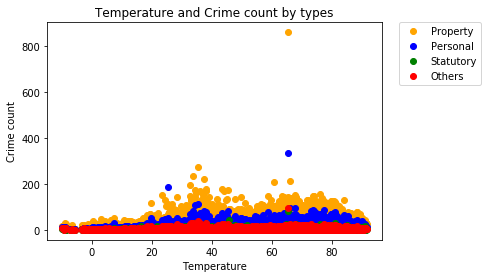

In [30]:
scatter_df = pd.pivot_table(combined_df,values='Case Number', index='Temp_Farenheit',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
scat_x = scatter_df.index.tolist()

Oth_scat = scatter_df[scatter_df.columns[0]]
Pers_scat = scatter_df[scatter_df.columns[1]]
Prop_scat = scatter_df[scatter_df.columns[2]]
Stat_scat = scatter_df[scatter_df.columns[3]]
# # scatter_df.to_csv(r'C:\Users\tepa7\Desktop\File Name.csv')
# ax = plt.plot(kind='scatter', x=scat_x, y=Oth_scat)
# plt.plot(scat_x,PersDF)
fig, ax = plt.subplots()
ax.plot(scat_x, Prop_scat, color = 'orange',linestyle='', marker='o', label = 'Property')
ax.plot(scat_x, Pers_scat, color = 'blue',linestyle='', marker='o',label = 'Personal')
ax.plot(scat_x, Stat_scat, color = 'green', linestyle='', marker='o', label = 'Statutory')
ax.plot(scat_x, Oth_scat, color = 'red', linestyle='', marker='o',label = 'Others')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Temperature")
plt.ylabel("Crime count")
plt.title('Temperature and Crime count by types')

#### Updated the y-limit to remove the one outlier of 800+ crime commited

(-5, 400)

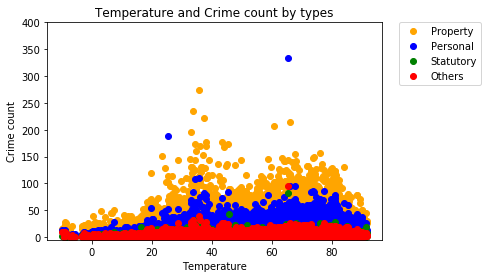

In [31]:
fig, ax = plt.subplots()
ax.plot(scat_x, Prop_scat, color = 'orange',linestyle='', marker='o', label = 'Property')
ax.plot(scat_x, Pers_scat, color = 'blue',linestyle='', marker='o',label = 'Personal')
ax.plot(scat_x, Stat_scat, color = 'green', linestyle='', marker='o', label = 'Statutory')
ax.plot(scat_x, Oth_scat, color = 'red', linestyle='', marker='o',label = 'Others')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Temperature")
plt.ylabel("Crime count")
plt.title('Temperature and Crime count by types')
ax.set_ylim(-5,400)

#### Create the pivot table and print to determine the column indices so we can extract a series for our line chart

In [32]:
buckets = pd.pivot_table(combined_df,values='Case Number', index='TempBucket',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets.head()

bucket,Other,Personal,Property,Statutory
TempBucket,,,,
< -5 degrees,51,79,180,8
-5 to 4.9 degrees,179,520,1392,141
5 to 14.9 degrees,391,1310,2937,306
15 to 24.9 degrees,1005,3233,7532,902
25 to 34.9 degrees,2439,8613,19144,2249


In [33]:
OthDF = buckets[buckets.columns[0]]
PersDF = buckets[buckets.columns[1]]
PropDF = buckets[buckets.columns[2]]
StatDF = buckets[buckets.columns[3]]
x = buckets.index.tolist()

In [34]:
OthDF

TempBucket
< -5 degrees            51
-5 to 4.9 degrees      179
5 to 14.9 degrees      391
15 to 24.9 degrees    1005
25 to 34.9 degrees    2439
35 to 44.9 degrees    2840
45 to 54.9 degrees    2779
55 to 64.9 degrees    3016
65 to 74.9 degrees    4122
75 to 84.9 degrees    2552
85 to 95 degrees       598
Name: Other, dtype: int64

In [35]:
PersDF

TempBucket
< -5 degrees             79
-5 to 4.9 degrees       520
5 to 14.9 degrees      1310
15 to 24.9 degrees     3233
25 to 34.9 degrees     8613
35 to 44.9 degrees     9964
45 to 54.9 degrees    10022
55 to 64.9 degrees    11476
65 to 74.9 degrees    16313
75 to 84.9 degrees    11209
85 to 95 degrees       2507
Name: Personal, dtype: int64

In [36]:
PropDF

TempBucket
< -5 degrees            180
-5 to 4.9 degrees      1392
5 to 14.9 degrees      2937
15 to 24.9 degrees     7532
25 to 34.9 degrees    19144
35 to 44.9 degrees    21098
45 to 54.9 degrees    20642
55 to 64.9 degrees    24153
65 to 74.9 degrees    33111
75 to 84.9 degrees    21127
85 to 95 degrees       4601
Name: Property, dtype: int64

In [37]:
StatDF

TempBucket
< -5 degrees             8
-5 to 4.9 degrees      141
5 to 14.9 degrees      306
15 to 24.9 degrees     902
25 to 34.9 degrees    2249
35 to 44.9 degrees    2511
45 to 54.9 degrees    2634
55 to 64.9 degrees    2574
65 to 74.9 degrees    3393
75 to 84.9 degrees    2538
85 to 95 degrees       657
Name: Statutory, dtype: int64

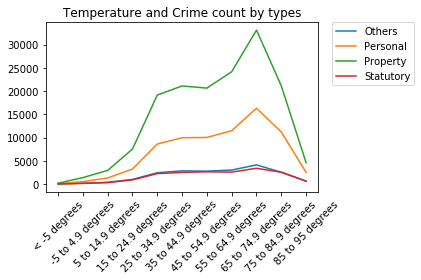

In [38]:
plt.plot(x,OthDF,label = 'Others')
plt.plot(x,PersDF,label = 'Personal' )
plt.plot(x,PropDF,label = 'Property')
plt.plot(x,StatDF,label = 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.title('Temperature and Crime count by types')

plt.tight_layout()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

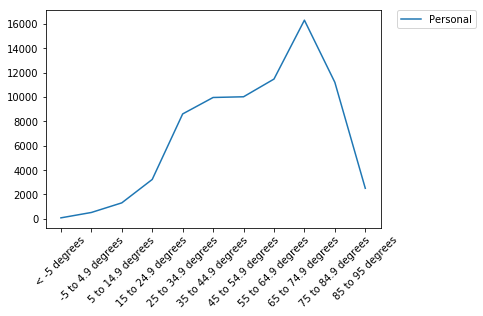

In [39]:
plt.plot(x,PersDF, label = 'Personal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)

In [40]:
# t = arange(0.0, 2.0, 0.01)
# s = sin(2.5*pi*t)
# plot(t, s)

# xlabel('time (s)')
# ylabel('voltage (mV)')
# title('Sine Wave')
# grid(True)
# show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

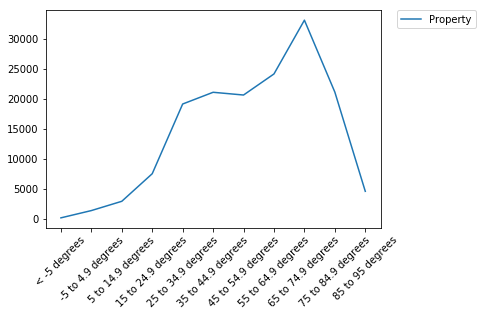

In [41]:
plt.plot(x,PropDF,label = 'Property')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

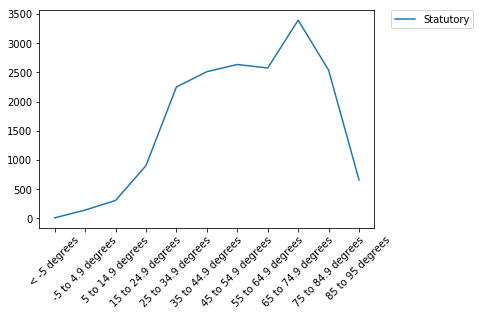

In [42]:
plt.plot(x,StatDF,label= 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)

In [45]:
#pivot by month

buckets_month = pd.pivot_table(combined_df,values='Case Number', index='Month',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets_month

bucket,Other,Personal,Property,Statutory
Month,,,,
1,1524,5543,12164,1407
2,1512,5161,10443,1573
3,1801,6423,11918,1871
4,1701,6007,11555,1854
5,1841,7052,12749,1847
6,1766,7272,13223,1760
7,1777,6964,14444,1637
8,1742,6923,14913,1275
9,1587,6539,14187,1328


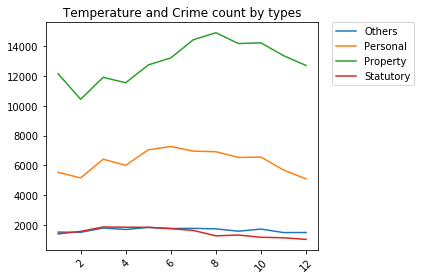

In [46]:
#plot crime by month
OthDF = buckets_month[buckets_month.columns[0]]
PersDF = buckets_month[buckets_month.columns[1]]
PropDF = buckets_month[buckets_month.columns[2]]
StatDF = buckets_month[buckets_month.columns[3]]
x = buckets_month.index.tolist()

plt.plot(x,OthDF,label = 'Others')
plt.plot(x,PersDF,label = 'Personal' )
plt.plot(x,PropDF,label = 'Property')
plt.plot(x,StatDF,label = 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.title('Temperature and Crime count by months')

plt.tight_layout()

In [47]:
#pivot by hours
buckets_hour = pd.pivot_table(combined_df,values='Case Number', index='Hour',columns='bucket',  aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets_hour.head()

bucket,Other,Personal,Property,Statutory
Hour,,,,
0,907,3910,7929,565
1,459,2912,4398,319
2,382,2662,3774,209
3,284,2188,3245,152
4,188,1630,2733,84


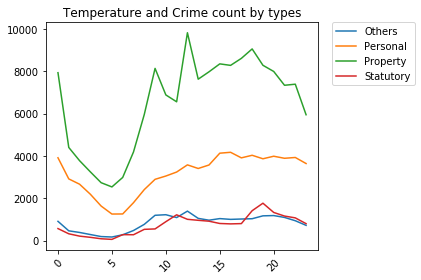

In [48]:
#plot by hours
OthDF = buckets_hour[buckets_hour.columns[0]]
PersDF = buckets_hour[buckets_hour.columns[1]]
PropDF = buckets_hour[buckets_hour.columns[2]]
StatDF = buckets_hour[buckets_hour.columns[3]]
x = buckets_hour.index.tolist()

plt.plot(x,OthDF,label = 'Others')
plt.plot(x,PersDF,label = 'Personal' )
plt.plot(x,PropDF,label = 'Property')
plt.plot(x,StatDF,label = 'Statutory')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)
plt.title('Temperature and Crime count by hours')

plt.tight_layout()

In [59]:
#pivot by degree and hours
buckets_degree_hour = pd.pivot_table(combined_df,values='Case Number', index='TempBucket',columns='Hour',  aggfunc=lambda x: len(x.unique()),fill_value=0)
buckets_degree_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
TempBucket,,,,,,,,,,,,,,,,,,,,,
< -5 degrees,0,0,0,8,7,8,11,9,38,41,...,31,0,0,0,0,0,0,0,0,0
-5 to 4.9 degrees,50,15,16,12,21,34,47,104,140,189,...,204,231,176,97,26,0,0,0,20,18
5 to 14.9 degrees,196,139,123,102,73,76,95,148,165,220,...,302,218,218,255,367,337,276,181,159,152
15 to 24.9 degrees,424,316,289,247,198,182,274,359,599,787,...,805,764,581,559,452,458,503,445,431,428
25 to 34.9 degrees,1681,886,861,700,604,557,677,962,1415,1825,...,1681,1673,1663,1530,1572,1417,1302,1220,1244,1231
35 to 44.9 degrees,1449,1023,904,809,614,588,716,1155,1706,2280,...,1679,1895,1689,1770,2042,1884,1795,1476,1340,1171
45 to 54.9 degrees,1847,980,912,735,648,590,649,981,1366,1944,...,1972,2107,2298,1963,1786,1723,1592,1372,1632,1369
55 to 64.9 degrees,1869,1167,1040,962,805,739,893,1193,1938,2582,...,1640,1662,1692,2077,2226,2118,1901,1911,1905,1492
65 to 74.9 degrees,2805,1989,1974,1756,1399,1073,1299,1683,2114,2653,...,3484,3363,2656,2358,2447,2261,2415,2452,2237,2004


In [70]:
#why crime is so high in 65 to 74.9 degrees and when that happens?
buckets_degree65 = buckets_degree.loc['65 to 74.9 degrees']
buckets_degree65

Hour
0     2805
1     1989
2     1974
3     1756
4     1399
5     1073
6     1299
7     1683
8     2114
9     2653
10    2652
11    2533
12    3896
13    3437
14    3484
15    3363
16    2656
17    2358
18    2447
19    2261
20    2415
21    2452
22    2237
23    2004
Name: 65 to 74.9 degrees, dtype: int64